# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [2]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [3]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

C:\Users\itapia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [4]:
#Merge customers and create pivot table of cust & offers

cust_mtx = df_transactions.merge(df_offers, on='offer_id').pivot_table(index=['customer_name'], columns=['offer_id'], values='n')

In [5]:
#Fill NaN with zeroes (0)

cust_mtx = cust_mtx.fillna(0).reset_index()

cust_mtx

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [6]:
cust_mtx.describe()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.100000,0.100000,0.060000,0.120000,0.040000,0.120000,0.190000,0.200000,0.100000,0.070000,...,0.050000,0.120000,0.060000,0.15000,0.090000,0.060000,0.170000,0.220000,0.170000,0.040000
std,0.301511,0.301511,0.238683,0.326599,0.196946,0.326599,0.394277,0.402015,0.301511,0.256432,...,0.219043,0.326599,0.238683,0.35887,0.287623,0.238683,0.377525,0.416333,0.377525,0.196946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

**What values of $SS$ do you believe represent better clusterings? Why?**

Minimizing the sum of squares error (SS) would represent better clusterings because that means there is less spread from the centroid to the data points related to the cluster.

The sum of squares is dependent on the number of clusters, lower the number of clusters the higher the sum of squares. As the number of clusters increase the SS reduces at a rapid rate initially and then the rate of decrease reduces. This leads to a elbow shaped curve when the SS is plotted against the number of cluster. The best clustering can be inferred from this graph, usually, the best clustering can be found at the point where there is maximum reduction in the slope of the curve.

**Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums)** 


In [7]:
#Extract columns and passs into np.matrix to create matrix of 0/1 columns

x_cols = np.matrix(cust_mtx.iloc[:,1:])
x_cols

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 1.]])

**Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix.**

In [8]:
from sklearn.cluster import KMeans

# Create a for loop to run a Kmeans model at each K

num_clusters = np.arange(2,11)

SS = np.empty(len(num_clusters))

for i, k in enumerate(num_clusters):
    clf = KMeans(n_clusters=k)
    clf.fit(x_cols)
    SS[i] = clf.inertia_

**Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.**

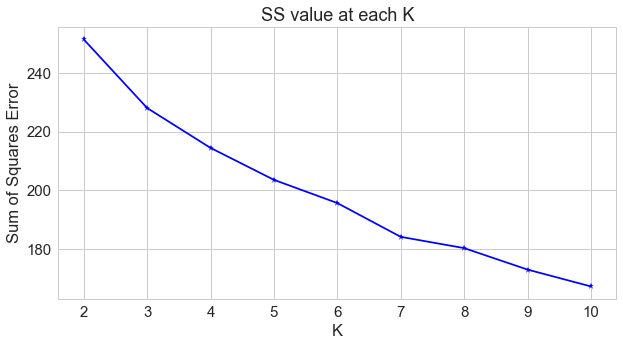

In [9]:
# Plot SS results for each value of K. Elbow method.


plt.figure(figsize=(10,5))
plt.title('SS value at each K')
plt.ylabel('Sum of Squares Error')
plt.xlabel('K')
plt.plot(range(2,11), SS, 'b*-')
plt.show()

The graph has no clear, sharp, elbow point. I will choose K=3 since the line visually appears to go down after that point.

**Make a bar chart showing the number of points in each cluster for k-means under the best $K$.**

In [10]:
# Fit the Kmeans model @ K=3. Random state = 5 throughout

kmeans_val = KMeans(n_clusters=3, random_state=5).fit_predict(x_cols)

# Create series of value counts for each cluster

cluster_kmeans_val = pd.Series(kmeans_val).value_counts().sort_index()

cluster_kmeans_val

0    47
1    36
2    17
dtype: int64

Text(0.5,1,'No. of points for Clusters (K = 3)')

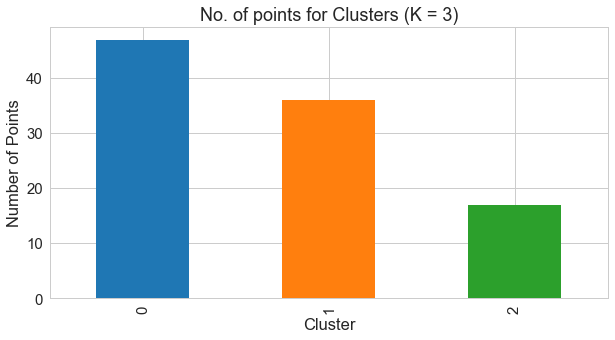

In [11]:
#Make bar chart of KMeans @ K=3 values

fig, axis = plt.subplots(1,1,figsize=(10,5))
cluster_kmeans_val.plot(kind='bar')
plt.ylabel('Number of Points')
plt.xlabel('Cluster')
plt.title('No. of points for Clusters (K = 3)')

**What challenges did you experience using the Elbow method to pick $K$?**

+ The choice of K was not very clear when using the elbow method. It did not provide a clear intuition about what the best value for k is.

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

For n_clusters = 2 , the average silhouette score is : 0.09174871508750351
For n_clusters = 3 , the average silhouette score is : 0.1176998005869721
For n_clusters = 4 , the average silhouette score is : 0.11470520492597679
For n_clusters = 5 , the average silhouette score is : 0.12090963033272623
For n_clusters = 6 , the average silhouette score is : 0.12146174271801277
For n_clusters = 7 , the average silhouette score is : 0.12015624578775488
For n_clusters = 8 , the average silhouette score is : 0.12398782106926276
For n_clusters = 9 , the average silhouette score is : 0.12129837343048354
For n_clusters = 10 , the average silhouette score is : 0.11388045928971953


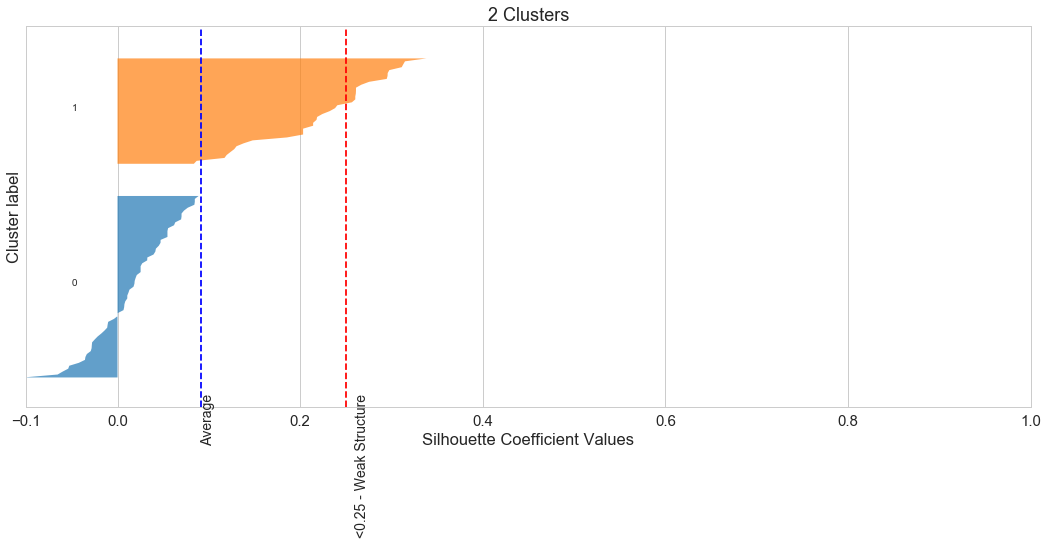

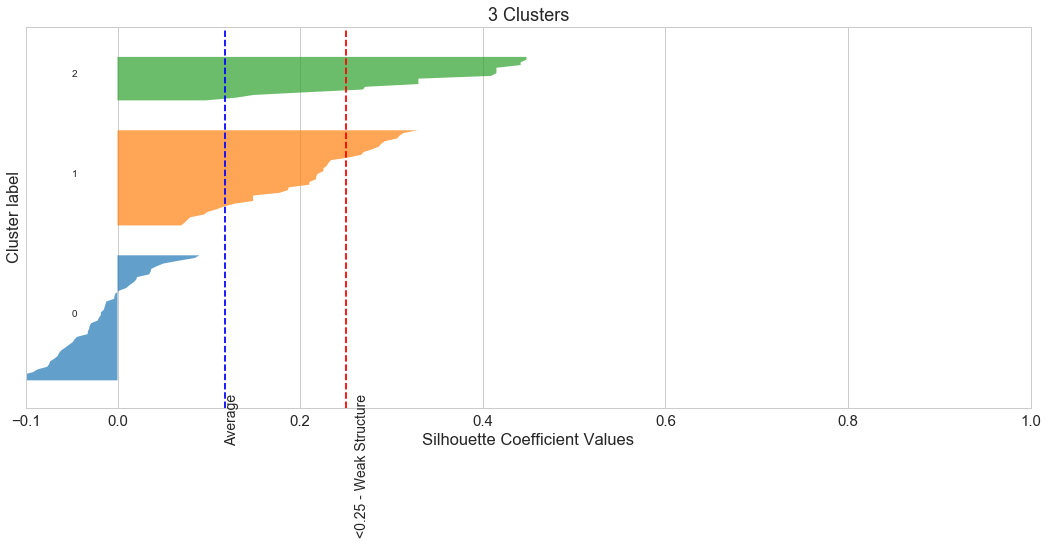

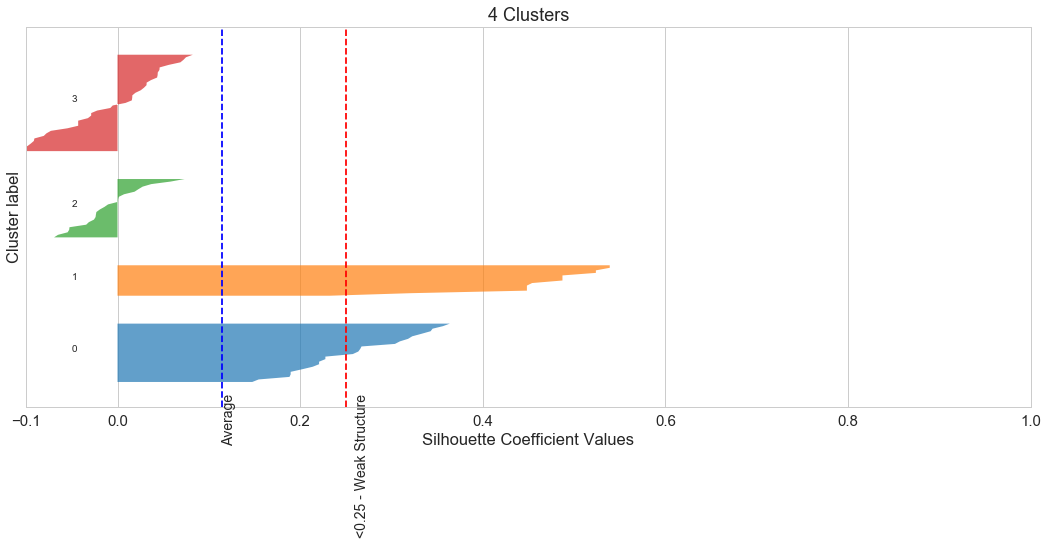

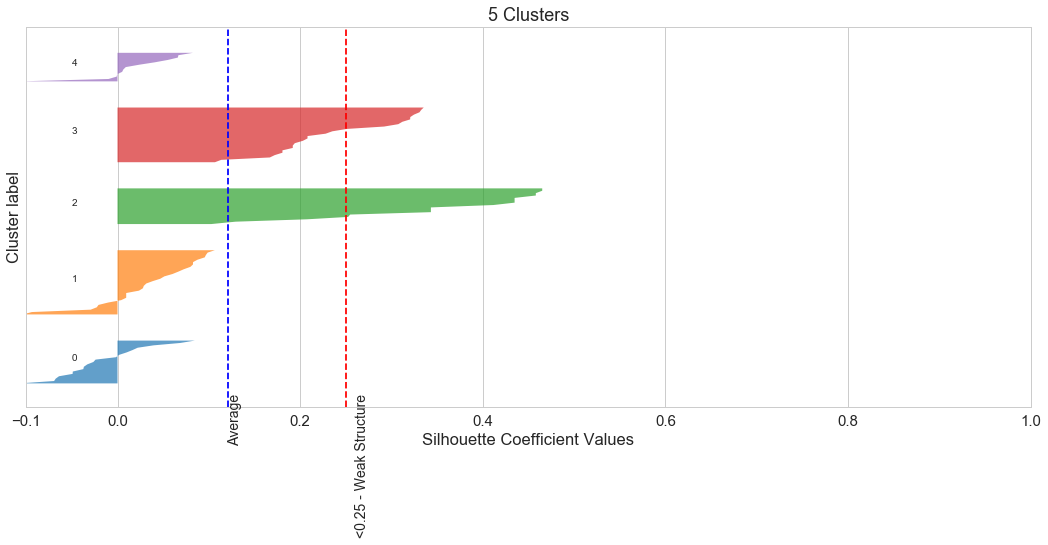

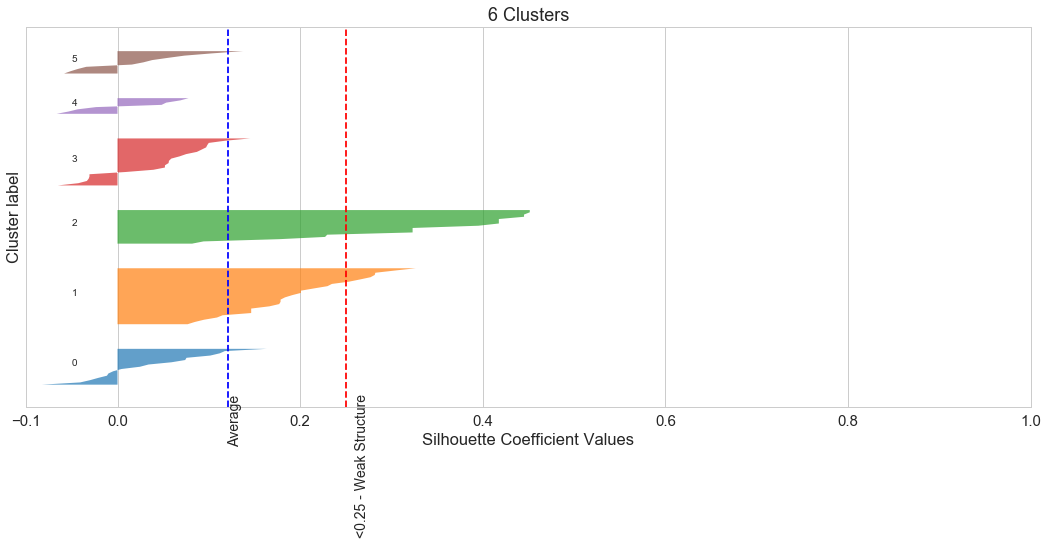

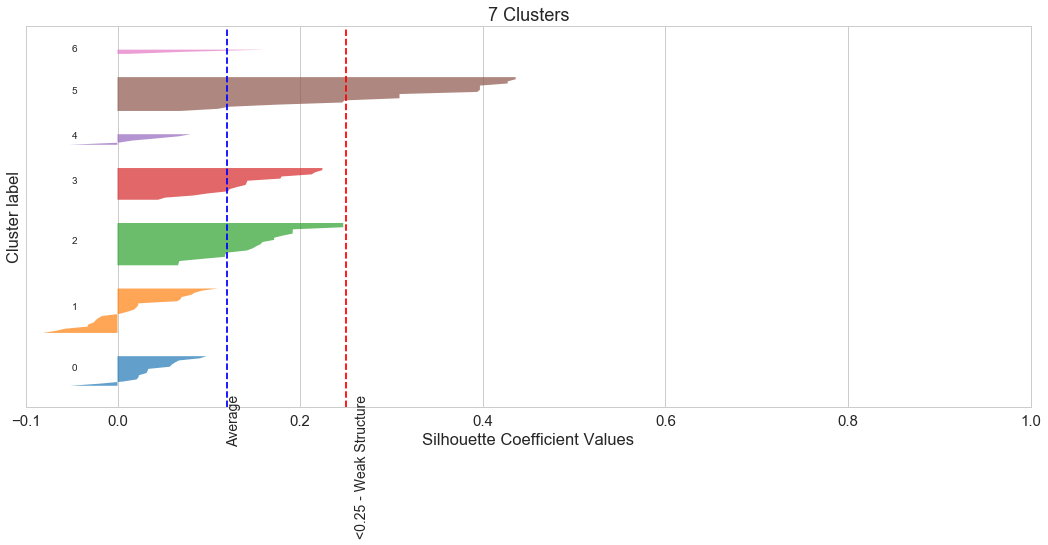

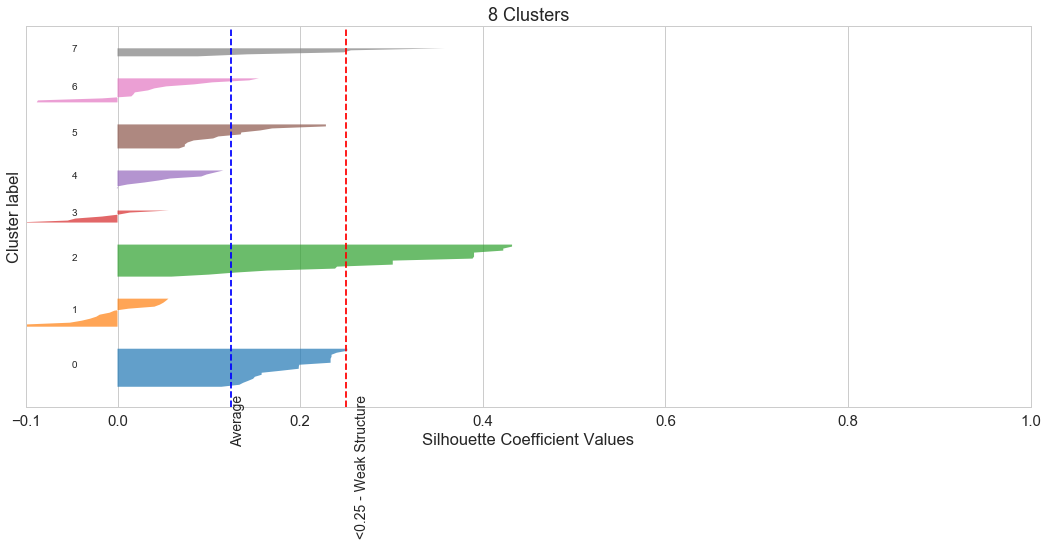

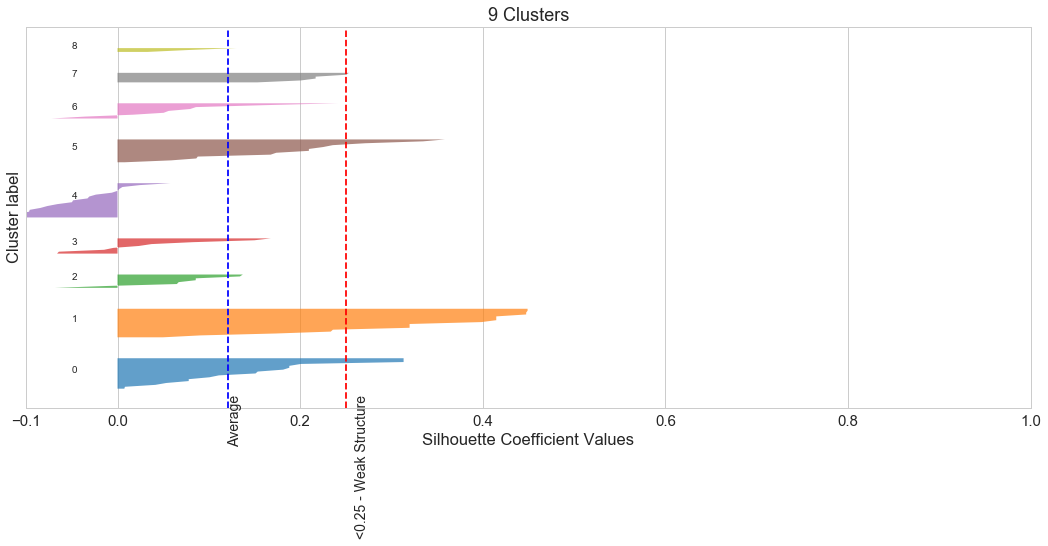

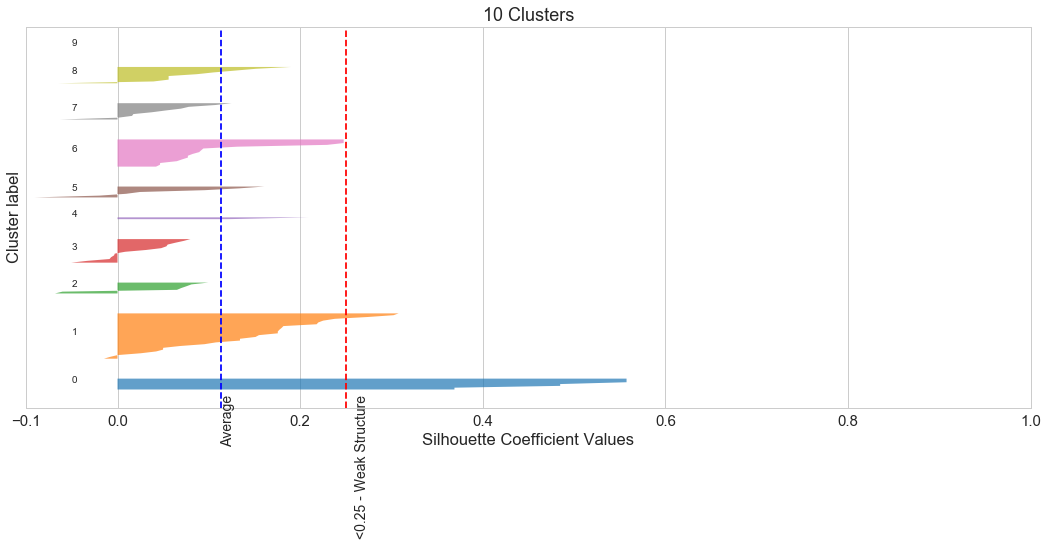

In [12]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

silhouette_avg = np.empty(len(num_clusters))

# For loop to create a series of silhouette plots

for k, cluster in enumerate(num_clusters):
    plt.figure(figsize=(18, 7))


# Create silhouette plots

    plt.xlim([-0.1, 1])
    plt.ylim([0, len(x_cols) + (cluster + 1) * 10])
    plt.yticks([])
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster label')
    plt.title('{} Clusters'.format(cluster))
    
# Initialize KMeans with each K cluster and fit_predict

    sil_clf = KMeans(n_clusters=cluster, random_state=5)
    sil_labels = sil_clf.fit_predict(x_cols)
    
# Compute the silhouette_score

    silhouette_avg[k] = silhouette_score(x_cols, sil_labels)
    
    print("For n_clusters =", cluster,
          ", the average silhouette score is :", silhouette_avg[k])
    
    sample_sil_value = silhouette_samples(x_cols, sil_labels)

    
# Plot the silhouette scores

    y_lower = 10
    
    for i in range(cluster):
        ith_cluster_s_value = sample_sil_value[sil_labels == i]
        
        ith_cluster_s_value.sort()
        
        size_cluster_i = ith_cluster_s_value.shape[0]
        y_upper = y_lower + size_cluster_i
        
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_s_value, alpha=0.7)
        
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
        
# This line denotes the average score 
        
    plt.axvline(x=silhouette_avg[k], color='blue', linestyle='--')
    plt.text((silhouette_avg[k]),1,'Average',fontsize=14, rotation=90)

# This line denotes weak or no structure found
    
    plt.axvline(x=0.25, color = 'red',linestyle='--')
    plt.text(0.26,1,'<0.25 - Weak Structure',fontsize=14, rotation=90)


**Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?**

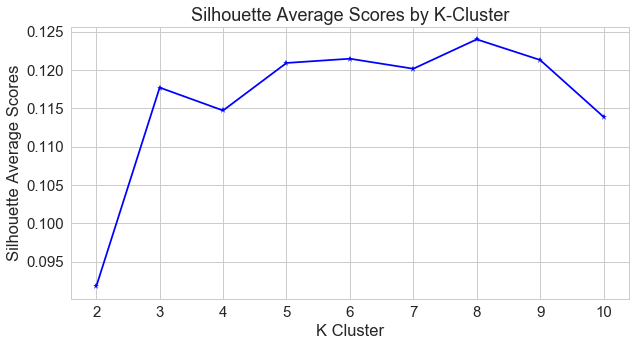

In [13]:
# Plot the silhouette average vs. k cluster

plt.figure(figsize=(10,5))
plt.plot(range(2, 11), silhouette_avg, 'b*-')
plt.xlabel('K Cluster')
plt.ylabel('Silhouette Average Scores')
plt.title('Silhouette Average Scores by K-Cluster')
plt.show()

+ The highest average score is at K=8 with an average score of 0.131. Cluster labeled 5 had the largest coeficient.
+ These results are different than elbow method results. The elbow method suggested that K = 3 was the best clustering while the silhoutte method suggests that K = 8 is the best clustering.
+ It is worth noting, that the average scores for most of these clusters are close in value to each other. So the differences in scores are small. 
+ However, this average is lower than 0.25, so we cannot confidently say that there is a strong clustering structure in the data. 

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

**Apply PCA to reduce 32 dimensions into 2 components**

In [14]:
from sklearn.decomposition import PCA

#Create PCA object

pca = PCA(n_components = 2)

# Apply object to x_columns (offers 0/1 indicators)

matrix = np.matrix(pca.fit_transform(x_cols))

df_pca_matrix = pd.DataFrame(matrix)

df_pca_matrix.columns = ['x','y']

# Create df with customers and x & y colums
df_clusters = pd.DataFrame(cust_mtx.iloc[:,0])
df_clusters['x'], df_clusters['y'] = df_pca_matrix['x'], df_pca_matrix['y']

df_clusters.head()

,customer_name,x,y
0,Adams,1.007580,0.108215
1,Allen,-0.287539,0.044715
2,Anderson,-0.392032,1.038391
3,Bailey,0.699477,-0.022542
4,Baker,0.088183,-0.471695


** Create models of k = 8, k=5, and k =3, append results to df**

In [15]:
# PCA results at K = 8

k8_clusters = KMeans(n_clusters = 8, random_state = 5 )

# append labels to dataframe
df_clusters['cluster_label_k8'] = k8_clusters.fit_predict(x_cols)

df_clusters.head()

,customer_name,x,y,cluster_label_k8
0,Adams,1.007580,0.108215,5
1,Allen,-0.287539,0.044715,1
2,Anderson,-0.392032,1.038391,2
3,Bailey,0.699477,-0.022542,0
4,Baker,0.088183,-0.471695,3


In [16]:
# PCA results at K = 5

k8_clusters = KMeans( n_clusters = 5, random_state = 5 )

# append cluster classification to dataframe
df_clusters['cluster_label_k5'] = k8_clusters.fit_predict(x_cols)

df_clusters.head()

,customer_name,x,y,cluster_label_k8,cluster_label_k5
0,Adams,1.007580,0.108215,5,3
1,Allen,-0.287539,0.044715,1,1
2,Anderson,-0.392032,1.038391,2,2
3,Bailey,0.699477,-0.022542,0,3
4,Baker,0.088183,-0.471695,3,1


In [17]:
# A random state of 5 is used throughout 

k8_clusters = KMeans(n_clusters = 3, random_state = 5 )

# append cluster classification to dataframe
df_clusters['cluster_label_k3'] = k8_clusters.fit_predict(x_cols)

df_clusters.head()

,customer_name,x,y,cluster_label_k8,cluster_label_k5,cluster_label_k3
0,Adams,1.007580,0.108215,5,3,1
1,Allen,-0.287539,0.044715,1,1,0
2,Anderson,-0.392032,1.038391,2,2,2
3,Bailey,0.699477,-0.022542,0,3,1
4,Baker,0.088183,-0.471695,3,1,0


**Plot Results of clusters and PCA**

Text(36.225,0.5,'Component 2')

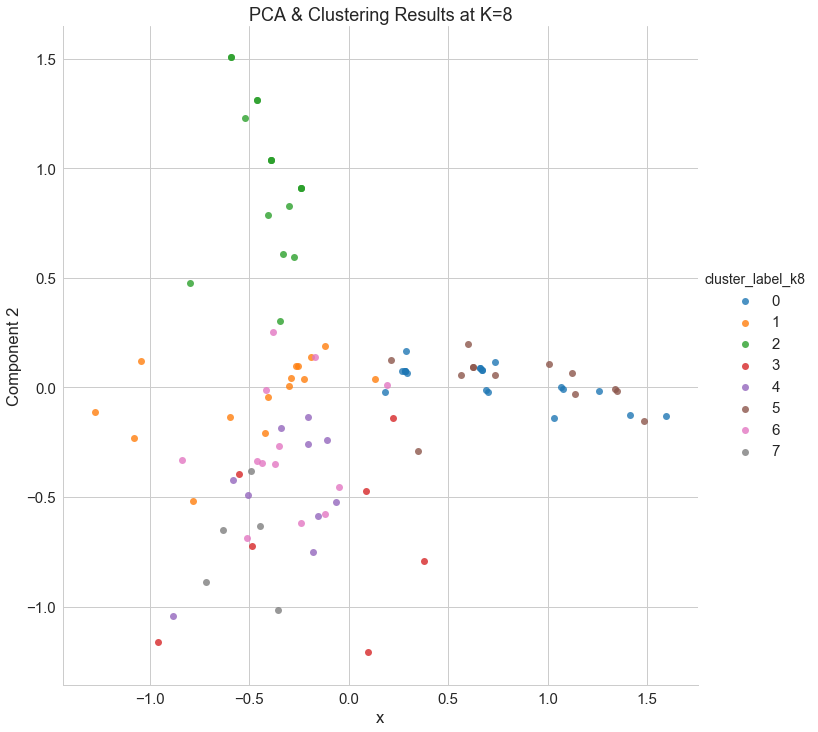

In [18]:
# PCA & Clustering Results at K=8

sns.lmplot(data = df_clusters, x='x', y='y', hue='cluster_label_k8', 
           fit_reg=False, legend=True, legend_out=True,size=10)

plt.title('PCA & Clustering Results at K=8')
plt.ylabel('Component 1')
plt.ylabel('Component 2')

Text(36.2135,0.5,'Component 2')

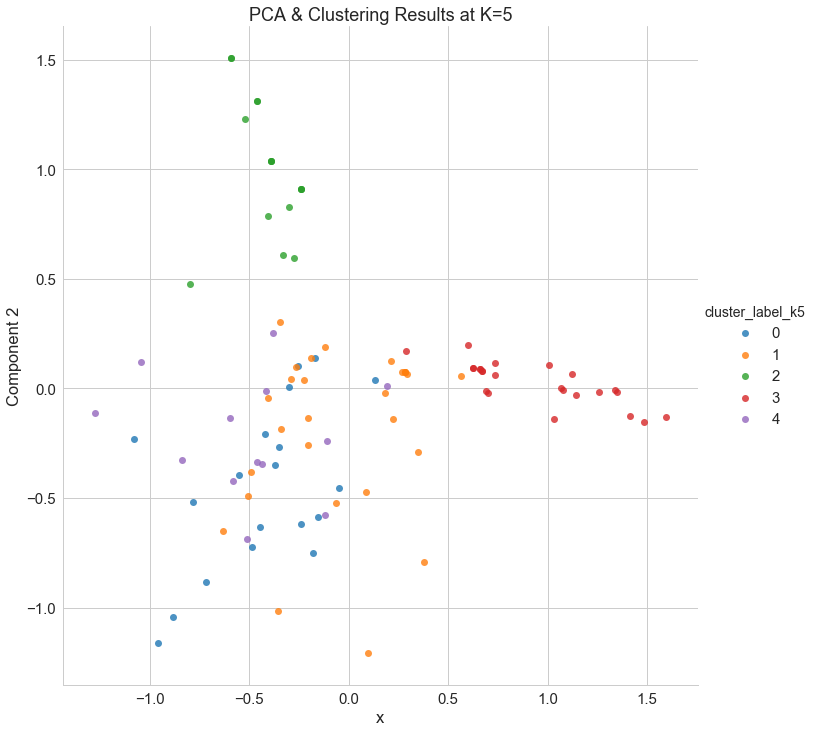

In [19]:
# PCA & Clustering Results at K=5

sns.lmplot(data = df_clusters, x='x', y='y', hue='cluster_label_k5', 
           fit_reg=False, legend=True, legend_out=True,size=10)

plt.title('PCA & Clustering Results at K=5')
plt.ylabel('Component 1')
plt.ylabel('Component 2')

Text(36.2135,0.5,'Component 2')

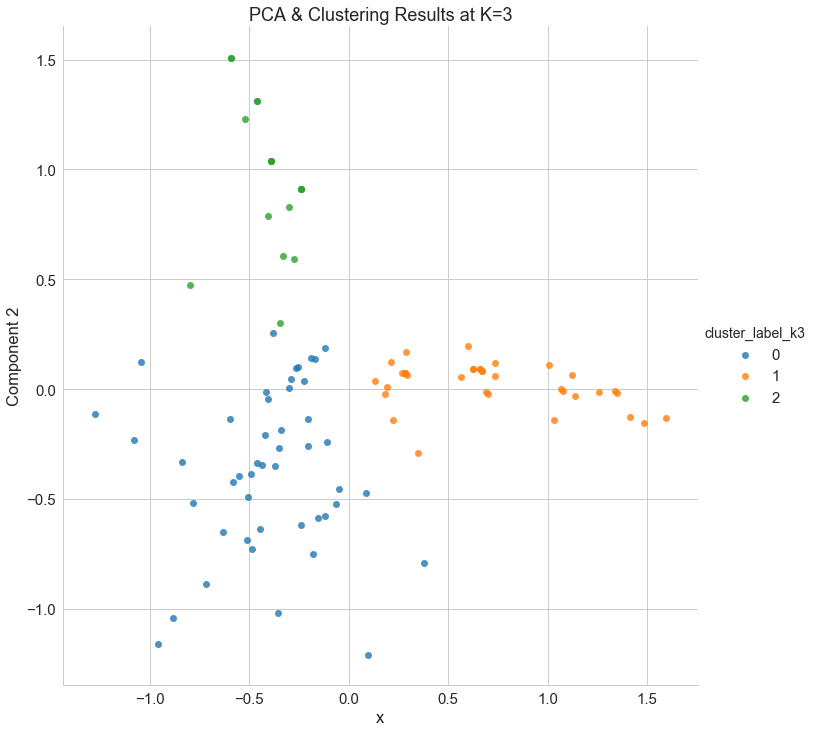

In [20]:
# PCA & Clustering Results at K=3

sns.lmplot(data = df_clusters, x='x', y='y', hue='cluster_label_k3', 
           fit_reg=False, legend=True, legend_out=True,size=10)

plt.title('PCA & Clustering Results at K=3')
plt.ylabel('Component 1')
plt.ylabel('Component 2')

**How do the clusters look?**

**Based on what you see, what seems to be the best value for  K? Moreover, which method of choosing  K seems to have produced the optimal result visually?**

+ The clusters for K= 8 and K= 5 do not look well defined and there are significant areas of overlap.
+ K= 3 looks like it has the best defined clusters. So the elbow method seems to have produced the optimal results visually for the number of clusters.

**Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?**

When merging clustering results with transaction and offer information some initial observations jump: 

1. Cluster 0 had the most amount of transactions.
2. Each cluster is dominated by several types of varietals, months and countries. 
3. Cluster 2 is mosltly composed of Oregon, French and South African wines of the pinot, and espumante types. 
4. Cluster 1 has more variety of types and countries, however there is larger min quantities. 
5. Cluster 3 is heavily dominated the pinot noir purchases. 

There seems that a combination of wine style tastes, plus minimun quantities is driving a lot of the clustering.

In [21]:
# Merge clusters with offer information

merged = df_clusters.merge(df_transactions, on = 'customer_name').merge(df_offers, on = 'offer_id')
merged

,customer_name,x,y,cluster_label_k8,cluster_label_k5,cluster_label_k3,offer_id,n,campaign,varietal,min_qty,discount,origin,past_peak
0,Adams,1.007580,0.108215,5,3,1,18,1,July,Espumante,6,50,Oregon,False
1,Gutierrez,0.346529,-0.288514,5,1,1,18,1,July,Espumante,6,50,Oregon,False
2,Hill,1.140585,-0.029993,5,3,1,18,1,July,Espumante,6,50,Oregon,False
3,James,1.484258,-0.155233,5,3,1,18,1,July,Espumante,6,50,Oregon,False
4,King,1.125346,0.065148,5,3,1,18,1,July,Espumante,6,50,Oregon,False
5,Myers,0.627230,0.093161,5,3,1,18,1,July,Espumante,6,50,Oregon,False
6,Perez,0.627230,0.093161,5,3,1,18,1,July,Espumante,6,50,Oregon,False
7,Perry,1.340000,-0.008172,5,3,1,18,1,July,Espumante,6,50,Oregon,False
8,Rivera,0.564060,0.056861,5,1,1,18,1,July,Espumante,6,50,Oregon,False
9,Ross,0.210842,0.123742,5,1,1,18,1,July,Espumante,6,50,Oregon,False


In [22]:
#Offer characteristics

charact = merged[['cluster_label_k3','campaign','varietal','min_qty','discount','origin','past_peak']]

In [23]:
# Cluster 1

cluster_1 = charact[charact['cluster_label_k3'] == 0]
cluster_1

,cluster_label_k3,campaign,varietal,min_qty,discount,origin,past_peak
13,0,July,Espumante,6,50,Oregon,False
24,0,November,Pinot Grigio,6,87,France,False
34,0,December,Malbec,6,54,France,False
39,0,December,Malbec,6,54,France,False
47,0,December,Malbec,6,54,France,False
51,0,December,Malbec,6,54,France,False
53,0,April,Chardonnay,144,57,Chile,False
54,0,April,Chardonnay,144,57,Chile,False
55,0,April,Chardonnay,144,57,Chile,False
56,0,April,Chardonnay,144,57,Chile,False


In [24]:
#Cluster 2

cluster_2 = charact[charact['cluster_label_k3'] == 1]
cluster_2

,cluster_label_k3,campaign,varietal,min_qty,discount,origin,past_peak
0,1,July,Espumante,6,50,Oregon,False
1,1,July,Espumante,6,50,Oregon,False
2,1,July,Espumante,6,50,Oregon,False
3,1,July,Espumante,6,50,Oregon,False
4,1,July,Espumante,6,50,Oregon,False
5,1,July,Espumante,6,50,Oregon,False
6,1,July,Espumante,6,50,Oregon,False
7,1,July,Espumante,6,50,Oregon,False
8,1,July,Espumante,6,50,Oregon,False
9,1,July,Espumante,6,50,Oregon,False


In [25]:
# Cluster 3

cluster_3 = charact[charact['cluster_label_k3'] == 2]
cluster_3

,cluster_label_k3,campaign,varietal,min_qty,discount,origin,past_peak
69,2,October,Champagne,72,88,New Zealand,False
72,2,September,Pinot Noir,6,34,Italy,False
73,2,September,Pinot Noir,6,34,Italy,False
74,2,September,Pinot Noir,6,34,Italy,False
75,2,September,Pinot Noir,6,34,Italy,False
76,2,September,Pinot Noir,6,34,Italy,False
77,2,September,Pinot Noir,6,34,Italy,False
78,2,September,Pinot Noir,6,34,Italy,False
79,2,September,Pinot Noir,6,34,Italy,False
80,2,September,Pinot Noir,6,34,Italy,False


*Original Data*

In [26]:
#Transactions. Offers custumer purchased.
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


In [27]:
# All product offers
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [28]:
# Transformation to link customer purchases with offers
cust_mtx

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,Barnes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,Bell,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Bennett,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Brooks,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Brown,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


What we've done is we've taken those columns of 0/1 indicator variables, and we've transformed them into a 2-D dataset. We took one column and arbitrarily called it `x` and then called the other `y`. Now we can throw each point into a scatterplot. We color coded each point based on it's cluster so it's easier to see them.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

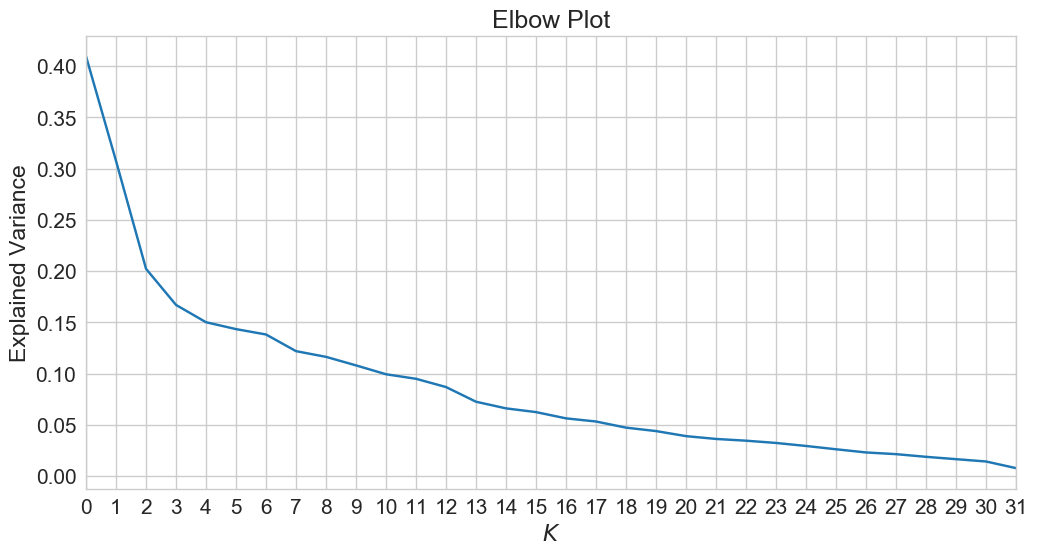

In [29]:
import sklearn.decomposition

pca2 = sklearn.decomposition.PCA()
pca2.fit(x_cols)

# Do the rest on your own :)

fig, axis = plt.subplots(1,1,figsize=(12,6),dpi=100)

_ = plt.plot(pca2.explained_variance_)
_ = plt.xlabel('$K$')
_ = plt.xticks(range(0,33,1))
_ = plt.xlim([0,31])
_ = plt.ylabel('Explained Variance')
_ = plt.title('Elbow Plot')

**Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?**

Based on the plot, it seems that the best possible values for the number of dimensions lies between 2 - 4.

## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


In [30]:
from sklearn.cluster import AffinityPropagation, SpectralClustering, AgglomerativeClustering, DBSCAN

**Affinity propagation**

In [31]:
#Affinity Propagation

#find the best value for damping parameter. 
dampings = [0.5, 0.6, 0.7, 0.8, 0.9]
best_score = 0.0

for damping in dampings:
    ap = AffinityPropagation(damping=damping)
    labels = ap.fit_predict(x_cols)
    silhouette_avg = silhouette_score(x_cols, labels, random_state=5)
    print("For damping =", damping,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_damping = damping
        
print('The best damping parameter is', best_damping)
print ('The best Affinity Propagation score is', best_score)

For damping = 0.5 The average silhouette_score is : 0.12346523604478911
For damping = 0.6 The average silhouette_score is : 0.12346523604478911
For damping = 0.7 The average silhouette_score is : 0.12346523604478911
For damping = 0.8 The average silhouette_score is : 0.08954554999885996
For damping = 0.9 The average silhouette_score is : 0.08954554999885996
The best damping parameter is 0.5
The best Affinity Propagation score is 0.12346523604478911


**Spectral Clustering**

In [32]:
#Spectral Clustering

#find the best value for n_clusters parameter. 
range_n_clusters = range(2,11)
best_score = 0.0
for n_clusters in range_n_clusters:
    sc = SpectralClustering(n_clusters=n_clusters)
    labels = sc.fit_predict(x_cols)
    silhouette_avg = silhouette_score(x_cols, labels, random_state=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
        
print('The best n_clusters parameter:',best_n_clusters)
print ('The best Spectral Clustering score is', best_score)

For n_clusters = 2 The average silhouette_score is : 0.0591405970172056
For n_clusters = 3 The average silhouette_score is : 0.09990591231024579
For n_clusters = 4 The average silhouette_score is : 0.029065698932750638
For n_clusters = 5 The average silhouette_score is : 0.015856768776882108
For n_clusters = 6 The average silhouette_score is : 0.017596416995300394
For n_clusters = 7 The average silhouette_score is : 0.046231912580754236
For n_clusters = 8 The average silhouette_score is : 0.052682243098372175
For n_clusters = 9 The average silhouette_score is : 0.06167468507260356
For n_clusters = 10 The average silhouette_score is : 0.033078128654124454
The best n_clusters parameter: 3
The best Spectral Clustering score is 0.09990591231024579


**Agglomerative Clustering**

In [33]:
#Agglomerative Clustering

#find the best value for n_clusters parameter. 
range_n_clusters = range(2,11)
best_score = 0.0
for n_clusters in range_n_clusters:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    labels = ac.fit_predict(x_cols)
    silhouette_avg = silhouette_score(x_cols, labels, random_state=5)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_n_clusters = n_clusters
        
print('The best n_clusters parameter:',best_n_clusters)
print ('The best AgglomerativeClustering score is', best_score)

For n_clusters = 2 The average silhouette_score is : 0.08258017823184984
For n_clusters = 3 The average silhouette_score is : 0.11625878863607858
For n_clusters = 4 The average silhouette_score is : 0.128937578158815
For n_clusters = 5 The average silhouette_score is : 0.14089739970831974
For n_clusters = 6 The average silhouette_score is : 0.1471521720461323
For n_clusters = 7 The average silhouette_score is : 0.15275152751051155
For n_clusters = 8 The average silhouette_score is : 0.15578053718604024
For n_clusters = 9 The average silhouette_score is : 0.12075124131971901
For n_clusters = 10 The average silhouette_score is : 0.09754750747147792
The best n_clusters parameter: 8
The best AgglomerativeClustering score is 0.15578053718604024


**DBSCAN**

In [34]:
#find the best value for min_samples parameter. 
range_min_samples = [1, 2, 3]
best_score = 0.0
for min_samples in range_min_samples:
    db = DBSCAN(min_samples=min_samples)
    labels = db.fit_predict(x_cols)
    silhouette_avg = silhouette_score(x_cols, labels, random_state=5)
    print("For min_samples =", min_samples,
          "The average silhouette_score is :", silhouette_avg)
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_min_samples = min_samples
        
print('The best min_samples parameter:',best_min_samples)
print ('The best DBSCAN score is', best_score)

For min_samples = 1 The average silhouette_score is : 0.19
For min_samples = 2 The average silhouette_score is : -0.021678059481408066
For min_samples = 3 The average silhouette_score is : -0.10663555825496372
The best min_samples parameter: 1
The best DBSCAN score is 0.19


**How do their results compare? Which performs the best? Tell a story why you think it performs the best.**

Best scores for each clustering approach are as follows

+ AffinityPropagation score is 0.127
+ SpectralClustering score is 0.105
+ AgglomerativeClustering score is 0.15
+ DBSCAN score is 0.19

The clustering models did not perform optimally. Each had a silhouette score < 0.25, which means that no or weak structure was found. I think this algorithm performed the best because is looking for "similar" neighbors rather than iterating through or making transformations to get to a lower dimensional space. Since this is a sample of individuals these methods may have less power than looking for similarities.


## End of Notebook